In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("sample_data/diabetes_dataset.csv")

In [7]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
data.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [15]:
X = data.drop("Outcome",axis=1)
Y = data["Outcome"]

In [16]:
X.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
dtype: int64

In [17]:
Y.count()

768

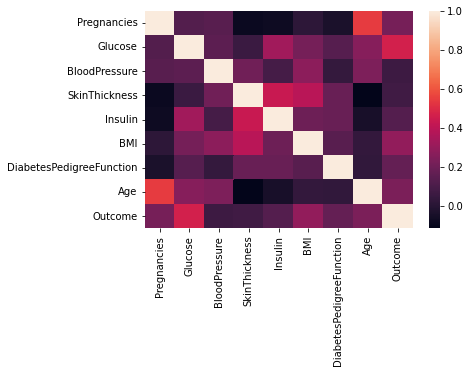

In [49]:
import seaborn as sns
sns.heatmap(data.corr())

In [19]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size = 0.20,random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [21]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="entropy",random_state=42)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [25]:
Y_predict = model.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(Y_test, Y_predict)
print(cm)
accuracy_score(Y_test, Y_predict)

[[76 23]
 [20 35]]


0.7207792207792207

In [30]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78        99
           1       0.60      0.64      0.62        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [43]:
model = DecisionTreeClassifier(criterion="entropy",random_state=42 , max_depth=2)
model.fit(X_train,Y_train)
Y_predict = model.predict(X_test)

In [44]:
cm = confusion_matrix(Y_test, Y_predict)
print(cm)
accuracy_score(Y_test, Y_predict)

[[86 13]
 [23 32]]


0.7662337662337663